## **GPA #2: Classification**

**Group 1**

*   Martina Cahya Pratiwi - 5026211144
*   Ravarel Harsha Athalla -5026321048

*   Thariq Abyan Arrayyan - 5026221217
*   Najwa Iqna Auliya - 5026221059

Link Video YT: https://youtu.be/_2ebgMNgPKU








### **1. Data Splitting**


Missing values in dataset:
Rpt Dist No              1
Premis Cd                2
Vict Age                 1
Vict Age Standardized    1
Vict Sex                 1
dtype: int64

Sample of transformed data:
   Day of Week  Month  Hour  Year  Time_of_Day  AREA      LAT       LON  \
0            7      3    21  2020            1     7  34.0375 -118.3506   
1            6      2    18  2020            1     1  34.0444 -118.2628   
2            3     11    17  2020            0     3  34.0210 -118.3002   
3            2      3    20  2020            1     9  34.1576 -118.4387   
4            1      8    12  2020            0     6  34.0944 -118.3277   

   Crm Cd                               Crm Cd Desc  Rpt Dist No  Premis Cd  \
0     510                          VEHICLE - STOLEN        784.0      101.0   
1     330                     BURGLARY FROM VEHICLE        182.0      128.0   
2     480                             BIKE - STOLEN        356.0      502.0   
3     343  SHOPLIFTING-GRAND

<ipython-input-3-e69e40b7a2d5>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)


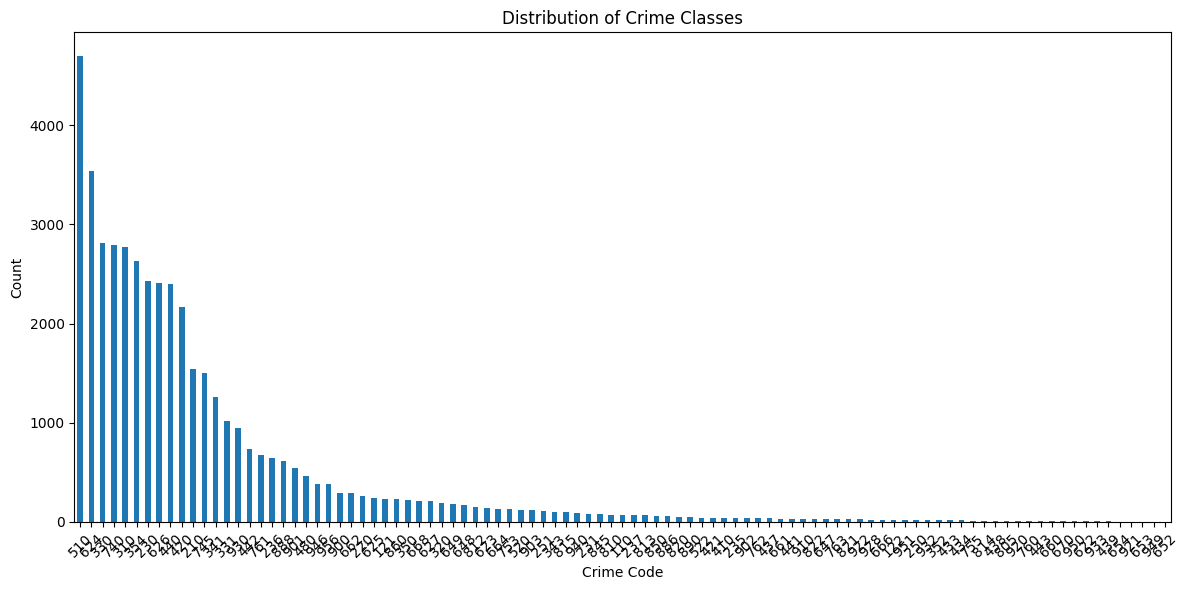


Cross-validation fold statistics:

Fold 1 class distribution (proportions):
Crm Cd
510    10.486056
624     7.904382
330     6.278884
740     6.231076
310     6.183267
         ...    
950     0.015936
949     0.015936
933     0.015936
622     0.015936
670     0.015936
Name: proportion, Length: 94, dtype: float64

Fold 2 class distribution (proportions):
Crm Cd
510    10.486056
624     7.904382
330     6.278884
740     6.231076
310     6.183267
         ...    
921     0.015936
654     0.015936
814     0.015936
660     0.015936
652     0.015936
Name: proportion, Length: 96, dtype: float64

Fold 3 class distribution (proportions):
Crm Cd
510    10.486056
624     7.904382
330     6.278884
740     6.231076
310     6.183267
         ...    
443     0.015936
622     0.015936
933     0.015936
653     0.015936
654     0.015936
Name: proportion, Length: 95, dtype: float64

Fold 4 class distribution (proportions):
Crm Cd
510    10.486056
624     7.904382
330     6.278884
740     6.231076
310  

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
data = pd.read_csv('cleaned_crime_data.csv')

# 2. Drop unnecessary columns
data = data.drop(columns=['Datetime','AREA NAME', 'LOCATION', 'Weapon Used Cd'])

# 3. Transform categorical variables
# Map 'Day of Week' to numbers (Monday = 1, Sunday = 7)
day_of_week_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
data['Day of Week'] = data['Day of Week'].map(day_of_week_mapping)

# Map 'Time_of_Day' (Day = 0, Night = 1)
time_of_day_mapping = {
    'Day': 0,
    'Night': 1
}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_mapping)

# Map 'Vict Sex' (M = 1, X = 3, F = 2)
vict_sex_mapping = {
    'M': 1,
    'X': 3,
    'F': 2
}
data['Vict Sex'] = data['Vict Sex'].map(vict_sex_mapping)

# 4. Encode 'Vict Descent' using LabelEncoder
label_encoder = LabelEncoder()
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])

# 5. Handle missing values
missing_values = data.isnull().sum()
print("\nMissing values in dataset:")
print(missing_values[missing_values > 0])
data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)

# 6. Display sample of transformed data
print("\nSample of transformed data:")
print(data.head())

# 7. Check class distribution
print("\nInitial class distribution:")
print(data['Crm Cd'].value_counts())

# 8. Prepare features and target
X = data.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)  # Features
y = data['Crm Cd']  # Class label

# 9. Filter out rare classes (less than 5 instances)
value_counts = y.value_counts()
classes_to_keep = value_counts[value_counts >= 5].index
data_filtered = data[data['Crm Cd'].isin(classes_to_keep)]

# 10. Redefine X and y after filtering
X = data_filtered.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data_filtered['Crm Cd']

# 11. Visualize class distribution
plt.figure(figsize=(12, 6))
y.value_counts().plot(kind='bar')
plt.title('Distribution of Crime Classes')
plt.xlabel('Crime Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. Split data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 13. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 14. Implement 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to display fold statistics
def display_fold_stats(X, y, fold_number, indices):
    fold_data = pd.DataFrame({'Crm Cd': y.iloc[indices]})
    print(f"\nFold {fold_number} class distribution (proportions):")
    print(fold_data['Crm Cd'].value_counts(normalize=True) * 100)
    return fold_data['Crm Cd'].value_counts(normalize=True)

# Collect statistics for each fold
fold_stats = []
print("\nCross-validation fold statistics:")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    fold_dist = display_fold_stats(X_train_scaled, y_train, fold, val_idx)
    fold_stats.append(fold_dist)

# Compare distributions across folds
fold_distributions = pd.concat(fold_stats, axis=1)
fold_distributions.columns = [f'Fold {i}' for i in range(1, 6)]
print("\nComparison of class distributions across folds:")
print(fold_distributions)

# 15. Display overall statistics
print("\nOverall Data Split Statistics:")
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set class distribution (proportions):")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set class distribution (proportions):")
print(y_test.value_counts(normalize=True) * 100)

# 16. Save processed datasets
train_data = pd.DataFrame({
    'y': y_train,
    **{f'feature_{i}': X_train_scaled[col] for i, col in enumerate(X_train.columns)}
})

test_data = pd.DataFrame({
    'y': y_test,
    **{f'feature_{i}': X_test_scaled[col] for i, col in enumerate(X_test.columns)}
})

print("\nProcessed datasets saved and ready for model training")

### **2. Experiment with k-NN Classification Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both training and test data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

def calculate_metrics(y_true, y_pred):
    """Calculate all required metrics."""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    return metrics

def run_kfold_experiment(X, y, k_value, n_splits=5):
    """Run k-fold cross-validation for a specific k value."""
    knn = KNeighborsClassifier(n_neighbors=k_value)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_metrics = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        # Split data
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]

        # Impute missing values for this fold
        fold_imputer = SimpleImputer(strategy='mean')
        X_train_fold_imputed = pd.DataFrame(
            fold_imputer.fit_transform(X_train_fold),
            columns=X_train_fold.columns
        )
        X_val_fold_imputed = pd.DataFrame(
            fold_imputer.transform(X_val_fold),
            columns=X_val_fold.columns
        )

        # Train and predict
        knn.fit(X_train_fold_imputed, y_train_fold)
        y_pred = knn.predict(X_val_fold_imputed)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred)
        metrics['fold'] = fold
        fold_metrics.append(metrics)

    return pd.DataFrame(fold_metrics)

# Step 1: Define k values to experiment with
k_values = [5, 7, 11, 15, 21]  # Not too small, not too large

# Dictionary to store results for all k values
all_results = {}

print("\nStarting k-NN experiments with 5-fold cross-validation...")
print("\nStep 2 & 3: Running cross-validation and calculating metrics for each k value")

# Run experiments for each k value
for k in k_values:
    print(f"\nExperimenting with k={k}")
    results_df = run_kfold_experiment(X_train, y_train, k)
    all_results[k] = results_df

    print(f"\nResults for k={k}:")
    print("\nMetrics for each fold:")
    print(results_df.round(4))

    print("\nAverage metrics across folds:")
    mean_metrics = results_df.mean().round(4)
    std_metrics = results_df.std().round(4)
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print(f"{metric}: {mean_metrics[metric]} (±{std_metrics[metric]})")

# Step 4 & 7: Analyze results and find best k value
print("\nStep 4 & 7: Analyzing results across all k values")

# Calculate mean performance for each k value
summary_results = {}
for k, results in all_results.items():
    summary_results[k] = results.mean()[['accuracy', 'precision', 'recall', 'f1']]

summary_df = pd.DataFrame(summary_results).T
print("\nMean performance metrics for each k value:")
print(summary_df.round(4))

# Find best k value based on F1 score
best_k = summary_df['f1'].idxmax()
print(f"\nBest k value based on F1 score: {best_k}")

# Step 8: Train final model with best k value on full training data and evaluate on test set
print("\nStep 8: Evaluating best model on test set")
final_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the imputed training data
final_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_test_pred = final_model.predict(X_test_imputed)

# Calculate final metrics
final_metrics = calculate_metrics(y_test, y_test_pred)

print("\nFinal model performance on test set:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Starting k-NN experiments with 5-fold cross-validation...

Step 2 & 3: Running cross-validation and calculating metrics for each k value

Experimenting with k=5

Results for k=5:

Metrics for each fold:
   accuracy  precision  recall      f1  fold
0    0.2660     0.2426  0.2660  0.2452     1
1    0.2652     0.2427  0.2652  0.2444     2
2    0.2657     0.2428  0.2657  0.2454     3
3    0.2691     0.2470  0.2691  0.2483     4
4    0.2691     0.2458  0.2691  0.2479     5

Average metrics across folds:
accuracy: 0.267 (±0.0019)
precision: 0.2442 (±0.0021)
recall: 0.267 (±0.0019)
f1: 0.2462 (±0.0017)

Experimenting with k=7

Results for k=7:

Metrics for each fold:
   accuracy  precision  recall      f1  fold
0    0.2782     0.2437  0.2782  0.2524     1
1    0.2764     0.2428  0.2764  0.2503     2
2    0.2781     0.2439  0.2781  0.2523     3
3    0.2812     0.2460  0.2812  0.2545     4
4    0.2809     0.2452  0.2809  0.2542     5

Average metrics across folds:
accuracy: 0.279 (±0.002)
prec

### **3. Experiment with Naïve Bayes Classification Model**

In [ ]:
# Import tambahan library yang dibutuhkan
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Step 1: Eksperimen dengan 5-fold cross validation
print("Step 1: Melakukan eksperimen dengan 5-fold cross validation")
nb_models = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    print(f"\nFold ke-{fold}")

    # Split data untuk fold ini
    X_fold_train = X_train_scaled.iloc[train_idx]
    y_fold_train = y_train.iloc[train_idx]
    X_fold_val = X_train_scaled.iloc[val_idx]
    y_fold_val = y_train.iloc[val_idx]

    # Train model Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_fold_train, y_fold_train)

    # Simpan model
    nb_models.append(nb_model)

    # Prediksi
    y_pred = nb_model.predict(X_fold_val)
    y_pred_proba = nb_model.predict_proba(X_fold_val)

    # Simpan hasil untuk step berikutnya
    fold_results.append({
        'fold': fold,
        'model': nb_model,
        'y_true': y_fold_val,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Step 2: Menghitung metrik untuk setiap fold
print("\nStep 2: Menghitung metrik untuk setiap fold")
metrics_results = []

for result in fold_results:
    # Persiapkan data untuk ROC AUC
    unique_classes = np.unique(result['y_true'])
    y_true_bin = label_binarize(result['y_true'], classes=unique_classes)

    # Hitung metrik
    metrics = {
        'fold': result['fold'],
        'accuracy': accuracy_score(result['y_true'], result['y_pred']),
        'precision': precision_score(result['y_true'], result['y_pred'], average='weighted'),
        'recall': recall_score(result['y_true'], result['y_pred'], average='weighted'),
        'f1': f1_score(result['y_true'], result['y_pred'], average='weighted'),
        'auc_roc': roc_auc_score(y_true_bin,
                                label_binarize(result['y_pred'], classes=unique_classes),
                                average='weighted',
                                multi_class='ovr')
    }
    metrics_results.append(metrics)

    print(f"\nMetrik untuk Fold {metrics['fold']}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC-ROC: {metrics['auc_roc']:.4f}")

# Step 3: Analisis hasil performa kelima model
print("\nStep 3: Analisis hasil performa kelima model")
results_df = pd.DataFrame(metrics_results)
print("\nRingkasan statistik untuk semua fold:")
print(results_df.describe())

print("\nPerbandingan performa antar fold:")
print(results_df)

# Step 4: Analisis hasil performa untuk menentukan model terbaik
print("\nStep 4: Analisis untuk menentukan model terbaik")
# Menentukan model terbaik berdasarkan F1-score
best_fold_idx = results_df['f1'].argmax()
best_model = nb_models[best_fold_idx]
best_metrics = results_df.iloc[best_fold_idx]

print(f"\nModel terbaik ditemukan pada fold ke-{best_fold_idx + 1}")
print(f"Metrics model terbaik pada data validasi:")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"F1-score: {best_metrics['f1']:.4f}")
print(f"AUC-ROC: {best_metrics['auc_roc']:.4f}")

# Step 5: Evaluasi model terbaik pada data test
print("\nStep 5: Evaluasi model terbaik pada data test")
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_proba = best_model.predict_proba(X_test_scaled)

# Hitung metrik untuk data test
unique_classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=unique_classes)
y_test_pred_bin = label_binarize(y_test_pred, classes=unique_classes)

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred, average='weighted'),
    'recall': recall_score(y_test, y_test_pred, average='weighted'),
    'f1': f1_score(y_test, y_test_pred, average='weighted'),
    'auc_roc': roc_auc_score(y_test_bin, y_test_pred_bin, average='weighted', multi_class='ovr')
}

print("\nPerforma model terbaik pada data test:")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"F1-score: {test_metrics['f1']:.4f}")
print(f"AUC-ROC: {test_metrics['auc_roc']:.4f}")

Step 1: Melakukan eksperimen dengan 5-fold cross validation

Fold ke-1

Fold ke-2

Fold ke-3

Fold ke-4

Fold ke-5

Step 2: Menghitung metrik untuk setiap fold

Metrik untuk Fold 1:
Accuracy: 0.0206
Precision: 0.0697
Recall: 0.0206
F1-score: 0.0204
AUC-ROC: 0.5078

Metrik untuk Fold 2:
Accuracy: 0.0164
Precision: 0.0744
Recall: 0.0164
F1-score: 0.0155
AUC-ROC: 0.5065

Metrik untuk Fold 3:
Accuracy: 0.0200
Precision: 0.0725
Recall: 0.0200
F1-score: 0.0182
AUC-ROC: 0.5077

Metrik untuk Fold 4:
Accuracy: 0.0253
Precision: 0.0705
Recall: 0.0253
F1-score: 0.0222
AUC-ROC: 0.5097

Metrik untuk Fold 5:
Accuracy: 0.0172
Precision: 0.0600
Recall: 0.0172
F1-score: 0.0171
AUC-ROC: 0.5066

Step 3: Analisis hasil performa kelima model

Ringkasan statistik untuk semua fold:
           fold  accuracy  precision    recall        f1   auc_roc
count  5.000000  5.000000   5.000000  5.000000  5.000000  5.000000
mean   3.000000  0.019879   0.069404  0.019879  0.018674  0.507666
std    1.581139  0.003494   0

### **4. Experiment with Logistic Regression Classification Model**

In [ ]:
# Import library yang dibutuhkan
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled,
    y_train,
    train_size=0.1,  # mengambil 10% data
    random_state=42,  # untuk reproducibility
    stratify=y_train  # memastikan distribusi kelas tetap seimbang
)

# Step 1: Eksperimen model dengan 5-fold cross validation
print("\nStep 1: Eksperimen Logistic Regression dengan 5-fold cross validation")
# Inisialisasi model dengan parameter yang dioptimalkan
lr_models = []
fold_results = []

# Pengaturan model yang lebih efisien
lr_params = {
    'solver': 'lbfgs',  # Solver yang efisien untuk multiclass
    'max_iter': 500,    # Mengurangi iterasi maksimum
    'multi_class': 'multinomial',
    'n_jobs': -1       # Menggunakan semua core CPU
}

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_sampled, y_train_sampled), 1):
    print(f"Training fold ke-{fold}...")

    # Split data
    X_fold_train = X_train_sampled.iloc[train_idx]
    y_fold_train = y_train_sampled.iloc[train_idx]
    X_fold_val = X_train_sampled.iloc[val_idx]
    y_fold_val = y_train_sampled.iloc[val_idx]

    # Train model
    lr = LogisticRegression(**lr_params)
    lr.fit(X_fold_train, y_fold_train)
    lr_models.append(lr)

    # Prediksi
    y_pred = lr.predict(X_fold_val)
    y_pred_proba = lr.predict_proba(X_fold_val)

    # Simpan hasil
    fold_results.append({
        'fold': fold,
        'y_true': y_fold_val,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Step 2: Menghitung metrik untuk setiap fold
print("\nStep 2: Menghitung metrik evaluasi untuk setiap fold")
metrics_results = []

for result in fold_results:
    print(f"\nMenghitung metrik untuk fold {result['fold']}...")
    metrics = {
        'fold': result['fold'],
        'accuracy': accuracy_score(result['y_true'], result['y_pred']),
        'precision': precision_score(result['y_true'], result['y_pred'], average='weighted'),
        'recall': recall_score(result['y_true'], result['y_pred'], average='weighted'),
        'f1': f1_score(result['y_true'], result['y_pred'], average='weighted')
    }

    # Hitung AUC-ROC
    try:
        # Persiapkan data untuk ROC AUC
        unique_classes = np.unique(result['y_true'])
        y_true_bin = label_binarize(result['y_true'], classes=unique_classes)
        y_pred_bin = label_binarize(result['y_pred'], classes=unique_classes)
        metrics['auc_roc'] = roc_auc_score(y_true_bin, y_pred_bin, average='weighted', multi_class='ovr')
    except:
        metrics['auc_roc'] = np.nan

    metrics_results.append(metrics)

    # Print hasil metrics
    print(f"Fold {metrics['fold']} metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC-ROC: {metrics['auc_roc']:.4f}")

# Step 3: Analisis performa kelima model
print("\nStep 3: Analisis performa kelima model")
results_df = pd.DataFrame(metrics_results)
print("\nStatistik deskriptif performa model:")
print(results_df.describe())

print("\nPerforma setiap fold:")
print(results_df)

# Step 4: Analisis untuk menentukan model terbaik
print("\nStep 4: Menentukan model terbaik")
best_fold_idx = results_df['f1'].argmax()
best_fold_metrics = results_df.iloc[best_fold_idx]

print(f"\nModel terbaik ada pada fold ke-{best_fold_idx + 1}")
print("Metrik model terbaik:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'auc_roc']:
    print(f"{metric}: {best_fold_metrics[metric]:.4f}")

# Step 5: Evaluasi model terbaik pada data test
print("\nStep 5: Evaluasi model terbaik pada data test")
best_model = lr_models[best_fold_idx]
y_test_pred = best_model.predict(X_test_scaled)

# Hitung metrik final
final_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred, average='weighted'),
    'recall': recall_score(y_test, y_test_pred, average='weighted'),
    'f1': f1_score(y_test, y_test_pred, average='weighted')
}

# Hitung AUC-ROC untuk test set
try:
    unique_classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    y_test_pred_bin = label_binarize(y_test_pred, classes=unique_classes)
    final_metrics['auc_roc'] = roc_auc_score(y_test_bin, y_test_pred_bin, average='weighted', multi_class='ovr')
except:
    final_metrics['auc_roc'] = np.nan

print("\nHasil evaluasi model terbaik pada data test:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Mengambil 10% sampel data...
Ukuran data original: 685032
Ukuran data setelah sampling: 68503

Step 1: Eksperimen Logistic Regression dengan 5-fold cross validation
Training fold ke-1...
Training fold ke-2...
Training fold ke-3...
Training fold ke-4...
Training fold ke-5...

Step 2: Menghitung metrik evaluasi untuk setiap fold

Menghitung metrik untuk fold 1...
Fold 1 metrics:
Accuracy: 0.2614
Precision: 0.1825
Recall: 0.2614
F1-score: 0.2062
AUC-ROC: 0.6067

Menghitung metrik untuk fold 2...
Fold 2 metrics:
Accuracy: 0.2636
Precision: 0.1909
Recall: 0.2636
F1-score: 0.2082
AUC-ROC: 0.6079

Menghitung metrik untuk fold 3...
Fold 3 metrics:
Accuracy: 0.2634
Precision: 0.2111
Recall: 0.2634
F1-score: 0.2094
AUC-ROC: 0.6076

Menghitung metrik untuk fold 4...
Fold 4 metrics:
Accuracy: 0.2569
Precision: 0.1918
Recall: 0.2569
F1-score: 0.2036
AUC-ROC: 0.6043

Menghitung metrik untuk fold 5...
Fold 5 metrics:
Accuracy: 0.2603
Precision: 0.1921
Recall: 0.2603
F1-score: 0.2062
AUC-ROC: 0.6060


### **5. Experiment with SVM Classification Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 1. Load the dataset
print("Loading the dataset...")
data = pd.read_csv('cleaned_crime_data.csv')

# 2. Sample 10% of the data for efficiency
print("Sampling 10% of the data...")
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# 3. Drop unnecessary columns
print("Dropping unnecessary columns...")
data = data.drop(columns=['Datetime', 'AREA NAME', 'LOCATION', 'Weapon Used Cd'])

# 4. Ensure no datetime columns remain
data = data.select_dtypes(exclude=['datetime'])

# 5. Transform categorical variables
print("Mapping categorical variables...")
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Day of Week'] = data['Day of Week'].map(day_of_week_mapping)

time_of_day_mapping = {'Day': 0, 'Night': 1}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_mapping)

vict_sex_mapping = {'M': 1, 'X': 3, 'F': 2}
data['Vict Sex'] = data['Vict Sex'].map(vict_sex_mapping)

# 6. Encode 'Vict Descent' using LabelEncoder
print("Encoding 'Vict Descent' with LabelEncoder...")
label_encoder = LabelEncoder()
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])

# 7. Handle missing values
print("Handling missing values...")
data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)

# 8. Prepare features and target
print("Preparing features and target...")
X = data.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data['Crm Cd']

# 9. Filter out rare classes (less than 5 instances)
print("Filtering rare classes with fewer than 5 instances...")
value_counts = y.value_counts()
classes_to_keep = value_counts[value_counts >= 5].index
data_filtered = data[data['Crm Cd'].isin(classes_to_keep)]
X = data_filtered.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data_filtered['Crm Cd']

# 10. Split data with stratified sampling
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 11. Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 12. Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 13. Set up SVM cross-validation with multiple kernels and C values
print("Setting up cross-validation...")
kernel_types = ['linear', 'rbf']
C_values = [0.1, 1, 10]
results = []

for kernel in tqdm(kernel_types, desc="Kernel Loop"):
    for C in tqdm(C_values, desc=f"Kernel: {kernel}", leave=False):
        model = svm.SVC(kernel=kernel, C=C, probability=True, random_state=42)
        strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Lists to store metrics for each fold
        accuracies, precisions, recalls, f1_scores, auc_rocs = [], [], [], [], []

        for fold, (train_index, val_index) in enumerate(tqdm(strat_k_fold.split(X_train_scaled, y_train), desc="Folds", leave=False), 1):
            X_train_fold, X_val_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)
            y_pred_proba = model.predict_proba(X_val_fold)

            # Calculate metrics
            accuracies.append(accuracy_score(y_val_fold, y_pred))
            precisions.append(precision_score(y_val_fold, y_pred, average='weighted'))
            recalls.append(recall_score(y_val_fold, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

            lb = LabelBinarizer()
            y_val_binarized = lb.fit_transform(y_val_fold)
            auc_rocs.append(roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr'))

        # Average metrics for each parameter combo
        results.append({
            'Kernel': kernel,
            'C': C,
            'Accuracy': np.mean(accuracies),
            'Precision': np.mean(precisions),
            'Recall': np.mean(recalls),
            'F1-Score': np.mean(f1_scores),
            'AUC-ROC': np.mean(auc_rocs)
        })

# 14. Display results
print("\nResults for each kernel and C value:")
for result in results:
    print(f"Kernel: {result['Kernel']}, C: {result['C']}")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  F1-Score: {result['F1-Score']:.4f}")
    print(f"  AUC-ROC: {result['AUC-ROC']:.4f}\n")


Loading the dataset...
Sampling 10% of the data...
Dropping unnecessary columns...
Mapping categorical variables...
Encoding 'Vict Descent' with LabelEncoder...
Handling missing values...
Preparing features and target...
Filtering rare classes with fewer than 5 instances...
Splitting data into training and test sets...
Scaling features...
Setting up cross-validation...


Kernel: linear:   0%|          | 0/3 [00:00<?, ?it/s]

Folds: 0it [00:00, ?it/s]

### **6. Experiment with Decision Tree (DT) Classification Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

# Sample data
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define StratifiedKFold with 5 splits
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid
max_depth_vals = [5, 10]
min_samples_split_vals = [2, 5]
min_samples_leaf_vals = [1, 3]
max_features_vals = ['sqrt', 'log2']
max_leaf_nodes_vals = [None, 20]
criteria = ['gini', 'entropy']

# Store results
results = []

def evaluate_fold(X_train, X_val, y_train, y_val, max_depth, min_samples_split,
                  min_samples_leaf, max_features, max_leaf_nodes, criterion):
    dt_model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        criterion=criterion,
        random_state=42
    )

    # Train and predict
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)
    y_prob = dt_model.predict_proba(X_val) if len(np.unique(y)) > 2 else None

    # Calculate metrics with zero_division handling for precision/recall
    fold_accuracy = accuracy_score(y_val, y_pred)
    fold_precision = precision_score(y_val, y_pred, average='weighted', zero_division=1)
    fold_recall = recall_score(y_val, y_pred, average='weighted', zero_division=1)
    fold_f1 = f1_score(y_val, y_pred, average='weighted', zero_division=1)

    # ROC AUC calculation for multiclass or binary
    if y_prob is not None:
        fold_auc = roc_auc_score(y_val, y_prob, average='weighted', multi_class='ovr')
    else:
        fold_auc = roc_auc_score(y_val, dt_model.predict_proba(X_val)[:, 1]) if len(np.unique(y)) == 2 else None

    return fold_accuracy, fold_precision, fold_recall, fold_f1, fold_auc

# Iterate over all combinations of parameters
for max_depth in max_depth_vals:
    for min_samples_split in min_samples_split_vals:
        for min_samples_leaf in min_samples_leaf_vals:
            for max_features in max_features_vals:
                for max_leaf_nodes in max_leaf_nodes_vals:
                    for criterion in criteria:
                        # Parallelized Stratified 5-fold cross-validation
                        metrics = Parallel(n_jobs=-1)(
                            delayed(evaluate_fold)(
                                X.iloc[train_index], X.iloc[test_index],
                                y.iloc[train_index], y.iloc[test_index],
                                max_depth, min_samples_split, min_samples_leaf,
                                max_features, max_leaf_nodes, criterion
                            )
                            for train_index, test_index in strat_k_fold.split(X, y)
                        )

                        # Collect per-fold results for display
                        fold_results = []
                        for i, (acc, prec, rec, f1, auc) in enumerate(metrics):
                            fold_results.append({
                                'fold': i + 1,
                                'accuracy': acc,
                                'precision': prec,
                                'recall': rec,
                                'f1_score': f1,
                                'auc_roc': auc
                            })

                        # Calculate average metrics for this combination
                        avg_accuracy = np.mean([m[0] for m in metrics])
                        avg_precision = np.mean([m[1] for m in metrics])
                        avg_recall = np.mean([m[2] for m in metrics])
                        avg_f1 = np.mean([m[3] for m in metrics])
                        avg_auc = np.mean([m[4] for m in metrics if m[4] is not None])

                        # Store results with per-fold details
                        results.append({
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'max_leaf_nodes': max_leaf_nodes,
                            'criterion': criterion,
                            'fold_results': fold_results,
                            'avg_accuracy': avg_accuracy,
                            'avg_precision': avg_precision,
                            'avg_recall': avg_recall,
                            'avg_f1_score': avg_f1,
                            'avg_auc_roc': avg_auc
                        })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)

# Display fold-level results for each parameter combination
for result in results:
    print(f"Parameter Combination: {result['max_depth'], result['min_samples_split'], result['min_samples_leaf'], result['max_features'], result['max_leaf_nodes'], result['criterion']}")
    for fold in result['fold_results']:
        print(f"  Fold {fold['fold']}: Accuracy = {fold['accuracy']}, Precision = {fold['precision']}, Recall = {fold['recall']}, F1 = {fold['f1_score']}, AUC = {fold['auc_roc']}")
    print("Average Metrics - ", "Accuracy:", result['avg_accuracy'], "Precision:", result['avg_precision'], "Recall:", result['avg_recall'], "F1 Score:", result['avg_f1_score'], "AUC:", result['avg_auc_roc'])
    print("\n")

# Identify the best model based on the highest F1-Score (or Accuracy if F1 is unavailable)
best_model_params = results_df.loc[results_df['avg_f1_score'].idxmax()] if 'avg_f1_score' in results_df else results_df.loc[results_df['avg_accuracy'].idxmax()]
print("Best Model Parameters:\n", best_model_params)


Parameter Combination: (5, 2, 1, 'sqrt', None, 'gini')
  Fold 1: Accuracy = 1.0, Precision = 1.0, Recall = 1.0, F1 = 1.0, AUC = 1.0
  Fold 2: Accuracy = 0.9333333333333333, Precision = 0.9333333333333333, Recall = 0.9333333333333333, F1 = 0.9333333333333333, AUC = 0.95
  Fold 3: Accuracy = 0.9, Precision = 0.9023569023569025, Recall = 0.9, F1 = 0.8997493734335839, AUC = 0.9216666666666666
  Fold 4: Accuracy = 0.9666666666666667, Precision = 0.9696969696969696, Recall = 0.9666666666666667, F1 = 0.9665831244778613, AUC = 0.975
  Fold 5: Accuracy = 0.9, Precision = 0.9023569023569024, Recall = 0.9, F1 = 0.8997493734335839, AUC = 0.925
Average Metrics -  Accuracy: 0.9400000000000001 Precision: 0.9415488215488216 Recall: 0.9400000000000001 F1 Score: 0.9398830409356724 AUC: 0.9543333333333333


Parameter Combination: (5, 2, 1, 'sqrt', None, 'entropy')
  Fold 1: Accuracy = 1.0, Precision = 1.0, Recall = 1.0, F1 = 1.0, AUC = 1.0
  Fold 2: Accuracy = 0.9666666666666667, Precision = 0.9696969696

### **7. Experiment with Back Propagation Neural Network (BPNN) Classification Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Load and preprocess data
data = pd.read_csv('cleaned_crime_data.csv').sample(1000, random_state=42)
data = data.drop(columns=['Datetime','AREA NAME', 'LOCATION', 'Weapon Used Cd'])

# Map 'Day of Week' to numbers
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                       'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Day of Week'] = data['Day of Week'].map(day_of_week_mapping)

# Map 'Time_of_Day' and 'Vict Sex'
data['Time_of_Day'] = data['Time_of_Day'].map({'Day': 0, 'Night': 1})
data['Vict Sex'] = data['Vict Sex'].map({'M': 1, 'X': 3, 'F': 2})

# Encode 'Vict Descent' and fill missing values in 'Premis Cd'
label_encoder = LabelEncoder()
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])

# Fill missing values in 'Premis Cd'
data['Premis Cd'] = data['Premis Cd'].fillna(data['Premis Cd'].mode()[0])

# Initial feature and label setup
X = data.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data['Crm Cd']

# Feature selection using RandomForestClassifier
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(X, y)

# Select important features based on threshold
selector = SelectFromModel(feature_selector, threshold=0.01, prefit=True)
X_reduced = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

# Update X with only the selected features
X = pd.DataFrame(X_reduced, columns=selected_features)

# Filter out infrequent classes
value_counts = y.value_counts()
classes_to_keep = value_counts[value_counts >= 5].index
data_filtered = data[data['Crm Cd'].isin(classes_to_keep)].reset_index(drop=True)

# Determine sample size based on available data
sample_size = min(1000, len(data_filtered))  # Ensure we don't sample more than available

# Take a random sample from the filtered data
data_sampled = data_filtered.sample(sample_size, random_state=42).reset_index(drop=True)

# Define features and labels on the sampled data
X = data_sampled.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data_sampled['Crm Cd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
y_train_cat = to_categorical(LabelEncoder().fit_transform(y_train))
y_test_cat = to_categorical(LabelEncoder().fit_transform(y_test))

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Parameter grid for BPNN
param_grid = {
    'hidden_layers': [1, 2],
    'neurons': [10, 20],
    'learning_rate': [0.01, 0.001],
    'epochs': [10, 100, 500],
    'activation_function': ['relu_sigmoid', 'sigmoid_sigmoid']
}

# Function to build model
def build_model(hidden_layers, neurons, learning_rate, activation_function):
    model = Sequential()
    for _ in range(hidden_layers):
        if activation_function == 'relu_sigmoid':
            model.add(Dense(neurons, activation='relu'))
        else:
            model.add(Dense(neurons, activation='sigmoid'))

    # Change the output layer for binary classification
    if y_train_cat.shape[1] == 2:
        model.add(Dense(1, activation='sigmoid'))  # Single output neuron with sigmoid activation
        loss = 'binary_crossentropy'
    else:
        model.add(Dense(y_train_cat.shape[1], activation='softmax'))
        loss = 'categorical_crossentropy'

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=loss,
                  metrics=['accuracy'])
    return model

# Set the number of splits to a minimum of 2 to avoid the ValueError
n_splits = max(2, min(5, value_counts.min()))
strat_k_fold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store results for each parameter combination
results = []

# Iterate over each parameter combination
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for learning_rate in param_grid['learning_rate']:
            for epochs in param_grid['epochs']:
                for activation_function in param_grid['activation_function']:
                    # Store cross-validation metrics
                    accuracies, precisions, recalls, f1_scores, auc_rocs = [], [], [], [], []

                    for train_idx, val_idx in strat_k_fold.split(X_train, y_train):
                        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
                        y_fold_train, y_fold_val = y_train_cat[train_idx], y_train_cat[val_idx]

                        # Build and train model
                        model = build_model(hidden_layers, neurons, learning_rate, activation_function)
                        model.fit(X_fold_train, y_fold_train, epochs=epochs, verbose = 0)

                        # Predict and calculate metrics
                        y_pred = model.predict(X_fold_val)
                        y_pred = np.nan_to_num(y_pred)

                        y_pred_classes = np.argmax(y_pred, axis=1)
                        y_val_classes = np.argmax(y_fold_val, axis=1)

                        # Calculate basic metrics
                        accuracy = accuracy_score(y_val_classes, y_pred_classes)
                        precision = precision_score(y_val_classes, y_pred_classes, average='weighted', zero_division=0)
                        recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
                        f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')

                        # Check if multiple classes are present in validation set for ROC AUC
                        if len(np.unique(y_val_classes)) > 1:
                            auc = roc_auc_score(y_fold_val, y_pred, multi_class='ovo', average='weighted')
                        else:
                            auc = np.nan

                        # Append metrics to lists
                        accuracies.append(accuracy)
                        precisions.append(precision)
                        recalls.append(recall)
                        f1_scores.append(f1)
                        auc_rocs.append(auc)

                        # Clear session to reset the model
                        K.clear_session()

                    # Store results
                    results.append({
                        'hidden_layers': hidden_layers,
                        'neurons': neurons,
                        'learning_rate': learning_rate,
                        'epochs': epochs,
                        'activation_function': activation_function,
                        'accuracy': np.mean(accuracies),
                        'precision': np.mean(precisions),
                        'recall': np.mean(recalls),
                        'f1_score': np.mean(f1_scores),
                        # Calculate mean AUC if there are valid (non-NaN) values, otherwise set to NaN
                        'auc_roc': np.nanmean(auc_rocs) if np.any(~np.isnan(auc_rocs)) else np.nan
                    })


# Convert results to DataFrame and find the best model
results_df = pd.DataFrame(results)
print("\nBPNN Cross-Validation Results:")
print(results_df)

# Select the best model parameters based on the highest F1 score
best_model_params = results_df.loc[results_df['f1_score'].idxmax()]
print("\nBest Model Parameters:\n", best_model_params)

# Train the best model on the entire training set
best_model = build_model(
    int(best_model_params['hidden_layers']),
    int(best_model_params['neurons']),
    float(best_model_params['learning_rate']),
    best_model_params['activation_function']
)
best_model.fit(X_train, y_train_cat, epochs=int(best_model_params['epochs']), verbose = 0)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred = np.nan_to_num(y_test_pred)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Calculate test metrics
test_accuracy = accuracy_score(y_test_classes, y_test_pred_classes)
test_precision = precision_score(y_test_classes, y_test_pred_classes, average='weighted', zero_division=0)
test_recall = recall_score(y_test_classes, y_test_pred_classes, average='weighted')
test_f1_score = f1_score(y_test_classes, y_test_pred_classes, average='weighted')

# Handle the case with only one class in y_true for AUC ROC calculation
if len(np.unique(y_test_classes)) > 1:
    test_auc_roc = roc_auc_score(y_test_cat, y_test_pred, multi_class='ovo', average='weighted')
else:
    test_auc_roc = np.nan  # Set AUC as NaN if only one class is present

print(f"\nTest Set Performance:\nAccuracy: {test_accuracy:.4f}\nPrecision: {test_precision:.4f}\nRecall: {test_recall:.4f}\nF1 Score: {test_f1_score:.4f}\nAUC ROC: {test_auc_roc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features: Index(['Day of Week', 'Month', 'Hour', 'Year', 'Time_of_Day', 'AREA', 'LAT',
       'LON', 'Rpt Dist No', 'Premis Cd', 'Vict Age', 'Vict Age Standardized',
       'Vict Sex', 'Vict Descent'],
      dtype='object')
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━